In [1]:
# Modules
import numpy as np
import xarray as xr
import pandas as pd

from data import data_loader
from data import gesla_preprocessing
from data import era5_preprocessing
from data import preprocessing

ModuleNotFoundError: No module named 'data'

# Description / Goals


- Check if manually chosen Hyperparameters of rf002 can be replicated by using either RandomSearchCV or GridSearch if they are restricted
- This shows whether the Algorithm get stuck in another minimum or if it stops before reaching the actual minimum. (Note: This requires though, that my manual choice was a good fit close to the minimum, right?).

# Next Steps

1. How do we optimize automatic search? <br>
    1.1 Eingrenzen von Automatischer hyperparameterwahl nah an meinen eigens identifizierten Werten per Learning Curve. Sollte ähnliche Ergebnisse liefern. (rf007)

    1.2 Add Pipeline to GridSearchCV? (Should be fine the way I implemented it already)

2. Evaluation module <br>

2.1 Confusion Matrix for teststatistic in each run to analyze overfitting (implemented but not checked for errors yet, wait for modelrun)<br> 

2.2 Error rate (#errors / #instances) --> Success rate / accuracy = 1 - error rate (see evaluation.cf_metrics, should be enough) <br>

2.3. Use Learning Curves to analyze overfitting during fitting process of hyperparameters (evaluation module, is that possible during model runs? (still need to check that, should be min(abs(traincurve - testcurve)))).

# Working Area

In [1]:
#---
# Load Hyperparamters of rf002
#---

import pickle
model_run = "rf002"
predictors = ["sp", "tp", "u10", "v10",]
percentile = 0.95

for predictor in predictors:
    sfolder = "models/random_forest/rf002/"
    fname = f"{model_run}_{predictor}{str(percentile)[-2:]}.pkl"

    with open(f"{sfolder}{fname}", 'rb') as f:
        params = pickle.load(f)

    print(f"Predictor: {predictor}, percentile: {percentile}")
    print(f"Hyperparameters: {params}")

Predictor: sp, percentile: 0.95
Hyperparameters: {'min_samples_leaf': 2, 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 500}
Predictor: tp, percentile: 0.95
Hyperparameters: {'min_samples_leaf': 2, 'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 500}
Predictor: u10, percentile: 0.95
Hyperparameters: {'min_samples_leaf': 2, 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 500}
Predictor: v10, percentile: 0.95
Hyperparameters: {'min_samples_leaf': 4, 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}


In [3]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 6)]
n_estimators

[100, 200, 300, 400, 500, 600]

Start Modelrun: 0
predictor: sp, optimizer: GridSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with GridSearchCV
Optimize Hyperparameters using GridSearchCV
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
Created directory: models/random_forest/rf007/
File saved to: models/random_forest/rf007/rf007_095.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8938053097345132
trainscore: 1.0
train/test: 1.118811881188119
Possible overfit
Created directory: results/random_forest/rf007/
saved importance to : results/random_forest/rf007/importance_

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


Show Confusion Matrix on traindata 

saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_0.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_0.pdf
Metric values 

tnr: 0.949238578680203
tpr: 0.5172413793103449
gmean: 0.7007035548155436
wacc: 0.7332399789952739
precision: 0.6
recall: 0.5172413793103449
fmeasure: 0.5555555555555556
Metric values 

tnr: 1.0
tpr: 1.0
gmean: 1.0
wacc: 1.0
precision: 1.0
recall: 1.0
fmeasure: 1.0
saved cf metrics to : traincf_metrics_95_0.pkl
Show AUROC 

AUC: 0.8892875897076843


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf007/AUROC_95_0.pdf
Start Modelrun: 1
predictor: sp, optimizer: RandomSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with RandomSearchCV
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
File saved to: models/random_forest/rf007/rf007_195.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8938053097345132
trainscore: 0.9985228951255539
train/test: 1.1171592787048277
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_1
saved tes

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_1.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_1.pdf
Metric values 

tnr: 0.9390862944162437
tpr: 0.5862068965517241
gmean: 0.741956105335083
wacc: 0.7626465954839838
precision: 0.5862068965517241
recall: 0.5862068965517241
fmeasure: 0.5862068965517241
Metric values 

tnr: 0.9982876712328768
tpr: 1.0
gmean: 0.9991434687935846
wacc: 0.9991438356164384
precision: 0.9893617021276596
recall: 1.0
fmeasure: 0.9946524064171123
saved cf metrics to : traincf_metrics_95_1.pkl
Show AUROC 

AUC: 0.882198494661299
saved AUROC to : results/random_forest/rf007/AUROC_95_1.pdf


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Start Modelrun: 2
predictor: tp, optimizer: GridSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with GridSearchCV
Optimize Hyperparameters using GridSearchCV
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
File saved to: models/random_forest/rf007/rf007_295.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8628318584070797
trainscore: 0.9911373707533235
train/test: 1.1487027989243648
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_2
saved testscore to : results/random_forest/rf007/testscore_95_2
saved trai

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_2.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_2.pdf
Metric values 

tnr: 0.949238578680203
tpr: 0.27586206896551724
gmean: 0.5117215241287079
wacc: 0.6125503238228601
precision: 0.4444444444444444
recall: 0.27586206896551724
fmeasure: 0.3404255319148936
Metric values 

tnr: 0.9897260273972602
tpr: 1.0
gmean: 0.9948497511671097
wacc: 0.9948630136986301
precision: 0.9393939393939394
recall: 1.0
fmeasure: 0.96875
saved cf metrics to : traincf_metrics_95_2.pkl
Show AUROC 

AUC: 0.8436898302117977


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf007/AUROC_95_2.pdf
Start Modelrun: 3
predictor: tp, optimizer: RandomSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with RandomSearchCV
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
File saved to: models/random_forest/rf007/rf007_395.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8185840707964602
trainscore: 0.8389955686853766
train/test: 1.0249351271507843
saved importance to : results/random_forest/rf007/importance_95_3
saved testscore to : resul

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_3.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_3.pdf
Metric values 

tnr: 0.8375634517766497
tpr: 0.6896551724137931
gmean: 0.7600197147064786
wacc: 0.7636093120952214
precision: 0.38461538461538464
recall: 0.6896551724137931
fmeasure: 0.4938271604938272
Metric values 

tnr: 0.8493150684931506
tpr: 0.7741935483870968
gmean: 0.8108848540793832
wacc: 0.8117543084401238
precision: 0.45
recall: 0.7741935483870968
fmeasure: 0.5691699604743083
saved cf metrics to : traincf_metrics_95_3.pkl
Show AUROC 

AUC: 0.848065814808332


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf007/AUROC_95_3.pdf
Start Modelrun: 4
predictor: u10, optimizer: GridSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with GridSearchCV
Optimize Hyperparameters using GridSearchCV
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
File saved to: models/random_forest/rf007/rf007_495.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.9026548672566371
trainscore: 0.9970457902511078
train/test: 1.1045703362585804
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_4
saved testsco

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_4.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_4.pdf
Metric values 

tnr: 0.9746192893401016
tpr: 0.41379310344827586
gmean: 0.6350517619978656
wacc: 0.6942061963941887
precision: 0.7058823529411765
recall: 0.41379310344827586
fmeasure: 0.5217391304347826
Metric values 

tnr: 0.9965753424657534
tpr: 1.0
gmean: 0.9982862026822535
wacc: 0.9982876712328768
precision: 0.9789473684210527
recall: 1.0
fmeasure: 0.9893617021276596
saved cf metrics to : traincf_metrics_95_4.pkl
Show AUROC 

AUC: 0.8793978645195168


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf007/AUROC_95_4.pdf
Start Modelrun: 5
predictor: u10, optimizer: RandomSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with RandomSearchCV
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
File saved to: models/random_forest/rf007/rf007_595.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8849557522123894
trainscore: 0.9940915805022157
train/test: 1.1233234859675036
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_5
saved te

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\evaluation.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(tight_layout=True,)


Show Confusion Matrix on testdata 

Show Confusion Matrix on traindata 



d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_5.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_5.pdf
Metric values 

tnr: 0.9441624365482234
tpr: 0.4827586206896552
gmean: 0.6751315098371609
wacc: 0.7134605286189393
precision: 0.56
recall: 0.4827586206896552
fmeasure: 0.5185185185185185
Metric values 

tnr: 0.9948630136986302
tpr: 0.989247311827957
gmean: 0.9920511891724286
wacc: 0.9920551627632936
precision: 0.968421052631579
recall: 0.989247311827957
fmeasure: 0.9787234042553192
saved cf metrics to : traincf_metrics_95_5.pkl
Show AUROC 

AUC: 0.8867495186416944
saved AUROC to : results/random_forest/rf007/AUROC_95_5.pdf
Start Modelrun: 6
predictor: v10, optimizer: GridSearchCV


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with GridSearchCV
Optimize Hyperparameters using GridSearchCV
Fitting 3 folds for each of 576 candidates, totalling 1728 fits
File saved to: models/random_forest/rf007/rf007_695.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8893805309734514
trainscore: 0.9926144756277696
train/test: 1.1160739875217707
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_6
saved testscore to : results/random_forest/rf007/testscore_95_6
saved trainscore to : results/random_forest/rf007/trainscore_95_6
s

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


Show Confusion Matrix on traindata 

saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_6.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_6.pdf
Metric values 

tnr: 0.9746192893401016
tpr: 0.3103448275862069
gmean: 0.5499709586082208
wacc: 0.6424820584631542
precision: 0.6428571428571429
recall: 0.3103448275862069
fmeasure: 0.4186046511627907
Metric values 

tnr: 0.9914383561643836
tpr: 1.0
gmean: 0.9957099759289266
wacc: 0.9957191780821918
precision: 0.9489795918367347
recall: 1.0
fmeasure: 0.9738219895287958
saved cf metrics to : traincf_metrics_95_6.pkl
Show AUROC 

AUC: 0.8646945562751619


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


saved AUROC to : results/random_forest/rf007/AUROC_95_6.pdf
Start Modelrun: 7
predictor: v10, optimizer: RandomSearchCV
Load Predictand from GESLA
Applied one-hot-encoding with Percentile: 0.95
Get overlapping timeseries of ERA5 and GESLA
X: (903, 121, 141)
Y: (903, 1)
Data is prepared as follows
X.shape : (903, 17061)
y.shape : (903,)
Start Model Training
Do Train-Test-Split
Optimize Hyperparameters from grid: {'n_estimators': [100, 200, 300, 400, 500, 600], 'max_depth': [2, 6, 11, 15, 20, None], 'min_samples_split': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]} with RandomSearchCV
Optimize Hyperparameters using RandomSearchCV
Fitting 3 folds for each of 100 candidates, totalling 300 fits
File saved to: models/random_forest/rf007/rf007_795.pkl
Saved Hyperparameters
Fit model
Save model
Evaluate Model 

testscore: 0.8893805309734514
trainscore: 0.9926144756277696
train/test: 1.1160739875217707
Possible overfit
saved importance to : results/random_forest/rf007/importance_95_7
saved te

d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:217: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig1.show()
d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cfm_fig2.show()


saved cf matrix to : results/random_forest/rf007/testcf_matrix_95_7.pdf
saved cf matrix to : results/random_forest/rf007/traincf_matrix_95_7.pdf
Metric values 

tnr: 0.9746192893401016
tpr: 0.3103448275862069
gmean: 0.5499709586082208
wacc: 0.6424820584631542
precision: 0.6428571428571429
recall: 0.3103448275862069
fmeasure: 0.4186046511627907
Metric values 

tnr: 0.9914383561643836
tpr: 1.0
gmean: 0.9957099759289266
wacc: 0.9957191780821918
precision: 0.9489795918367347
recall: 1.0
fmeasure: 0.9738219895287958
saved cf metrics to : traincf_metrics_95_7.pkl
Show AUROC 

AUC: 0.8646945562751619
saved AUROC to : results/random_forest/rf007/AUROC_95_7.pdf


d:\OneDrive\Alle_Ordner\Coding\Python\master_thesis\models\random_forest\rf007.py:267: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


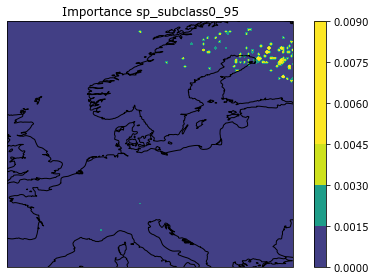

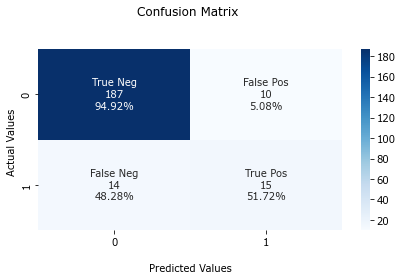

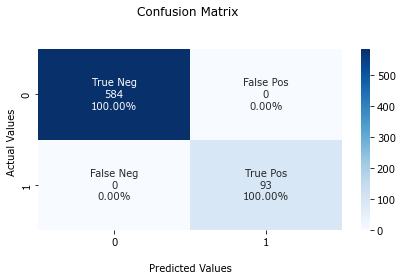

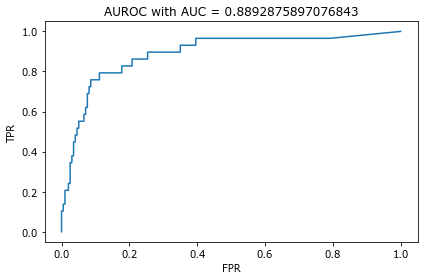

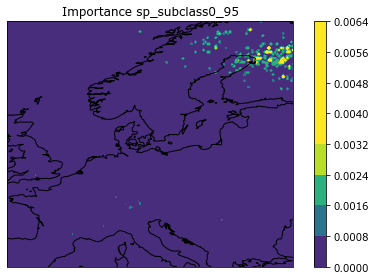

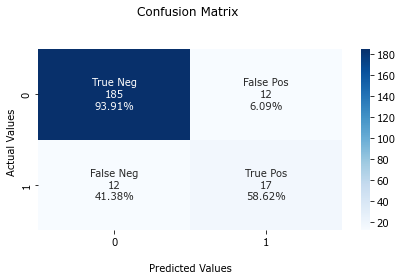

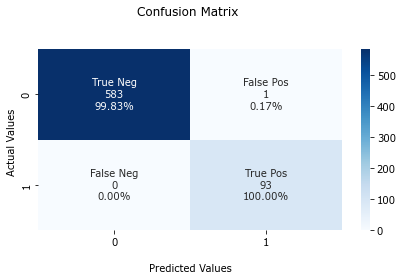

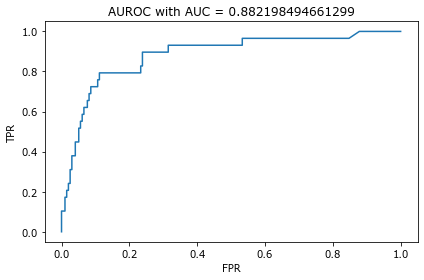

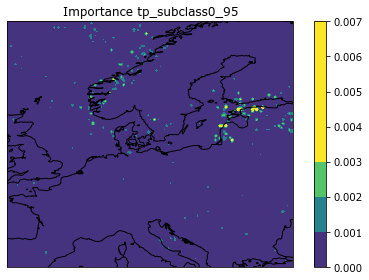

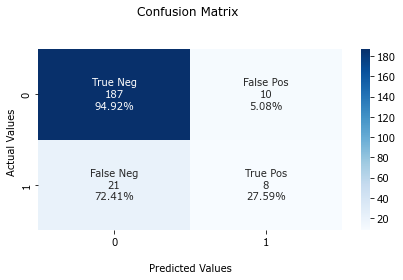

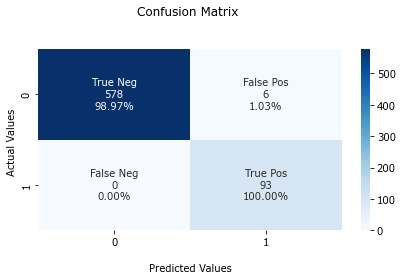

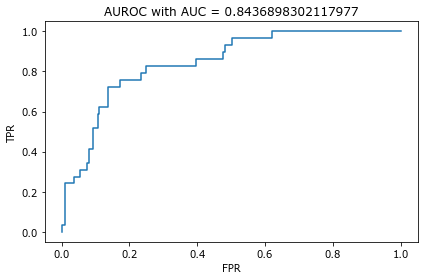

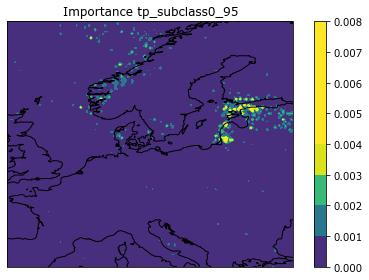

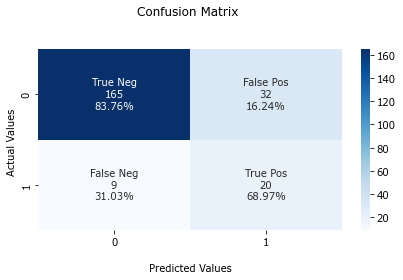

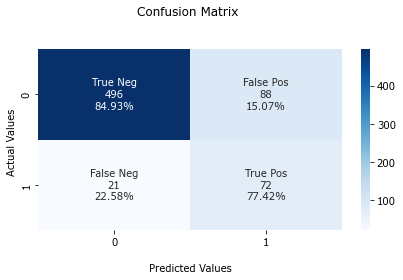

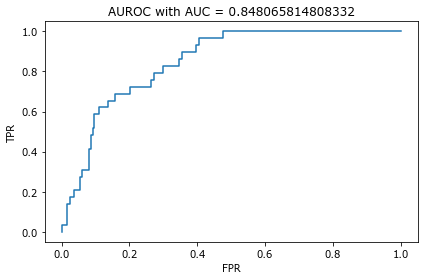

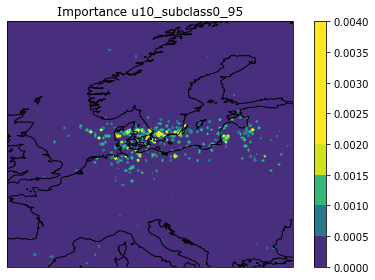

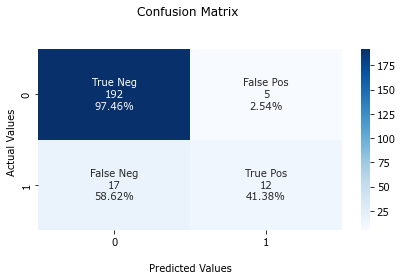

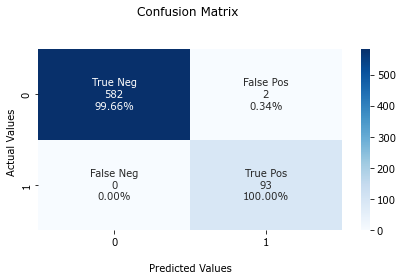

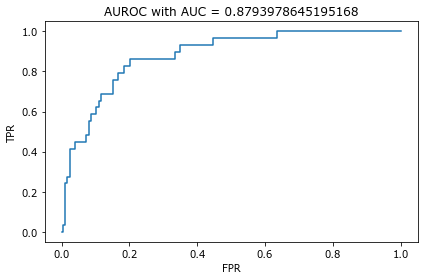

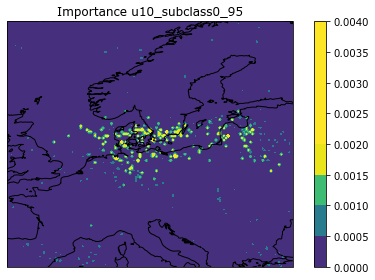

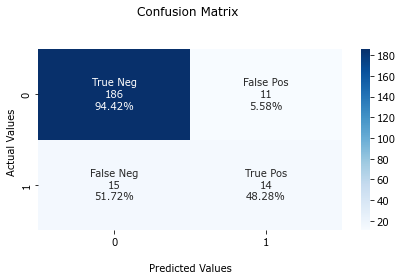

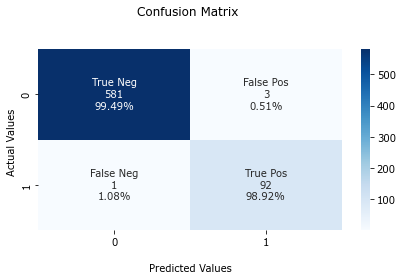

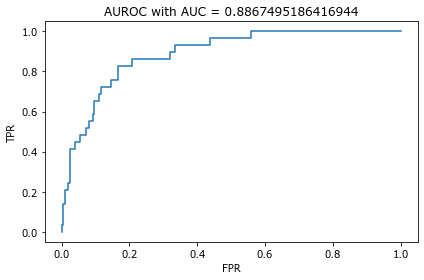

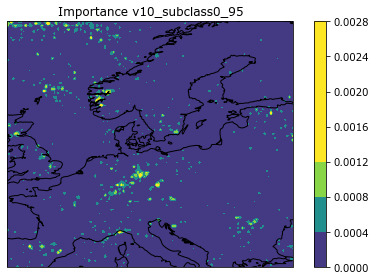

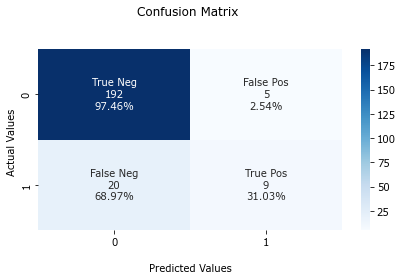

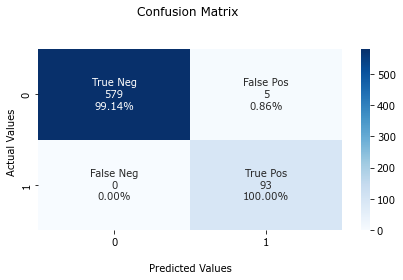

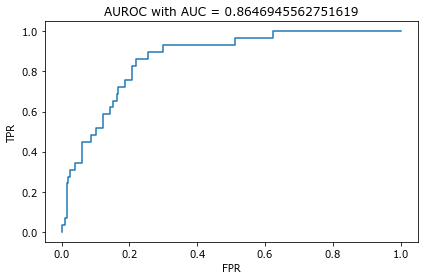

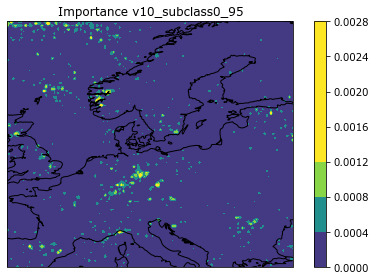

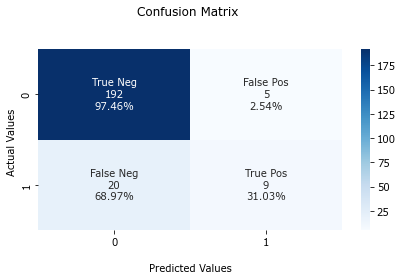

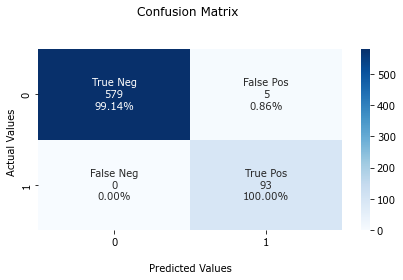

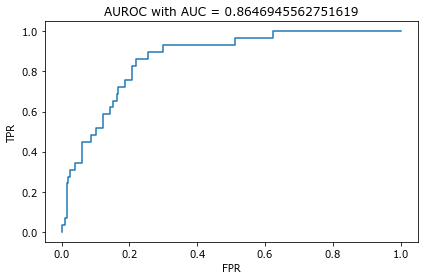

In [2]:
#--- 
# Modules
#---
from sklearn.ensemble import RandomForestClassifier
from models.random_forest import rf007
#---
# Initialize
#---
model_run = "rf007"
predictors = ["sp", "tp", "u10", "v10",]
optimizer = ["GridSearchCV", "RandomSearchCV",]
season = "winter"
station_names = ['hanko-han-fin-cmems',]
k = 3 # k-fold cross-validation
n_iter = 100 # number of combinations
percentile = 0.95
clf = RandomForestClassifier()



#---
# Create hyperparameter grid for automatic search
#---

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 6)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split an internal node
min_samples_split = [3, 4, 5, 6,]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4,]

param_grid = {'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        }

#---
# Run Models
#---
run_id = 0
for predictor in predictors:
        for opt in optimizer:
                print(f"Start Modelrun: {run_id}")
                print(f"predictor: {predictor}, optimizer: {opt}")
                rf007.run(season, predictor, opt, clf, k, n_iter, param_grid, percentile, station_names, run_id, model_run) 
                run_id = run_id + 1  

In [5]:
#---
# Display used hyperparameters for rf007
#---
from models import loader
predictors = ["sp", "tp", "u10", "v10",]
optimizer = ["GridSearchCV", "RandomSearchCV",]
run_id = 0
folder = "models/random_forest/rf007/"
for predictor in predictors:
        for opt in optimizer:
                model_path = f"{folder}rf007_{opt}_{run_id}.sav"
                model = loader.load_model(model_path)
                print(f"Predictor: {predictor}, Optimizer: {opt}")
                print(model)
                run_id = run_id + 1 


Predictor: sp, Optimizer: GridSearchCV
RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=4, oob_score=True, random_state=0)
Predictor: sp, Optimizer: RandomSearchCV
RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=200, oob_score=True, random_state=0)
Predictor: tp, Optimizer: GridSearchCV
RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=3,
                       min_samples_split=4, oob_score=True, random_state=0)
Predictor: tp, Optimizer: RandomSearchCV
RandomForestClassifier(class_weight='balanced', max_depth=2,
                       min_samples_split=5, n_estimators=300, oob_score=True,
                       random_state=0)
Predictor: u10, Optimizer: GridSearchCV
RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       min_samples_split=3, n_estimato